In [1]:
import json
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tqdm import tqdm
from nltk import tokenize


In [2]:
df = pd.read_csv('Phoenix_reviews.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop_duplicates()
df

,name,business_id,city,categories,review_id,text,stars,user_id
0,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",LyxX4jQXCj6p7ood9Y_ung,Love Wetzel's pretzels! I always get them when...,5.0,7C4B2Skmh4X9f8xJDo9O4w
2,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",WqQkmdfkcvQZNGpI6Xzfow,Wetzels's Pretzels is definitely amazing and v...,5.0,eavBO3KRzBf8sM6KGa_-NQ
3,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",lJsEaUqx_iS-IsPD3SHWlg,I love Wetzel's Pretzels. And I can't imagine ...,5.0,sYQyXDjGaJj7wfaqz5u8KQ
4,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",PfyDflR_hCtMsqR19KkNsg,"Never heard of the cheese meltdown pretzel, bu...",4.0,ELcQDlf69kb-ihJfxZyL0A
5,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",RcsBd87ZxdI6h9A-E80X1A,"PV Mall's food court needs updating, but that ...",4.0,y9yLaWKlT2aXLBs50FGvaw
...,...,...,...,...,...,...,...,...
517599,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",UHxh8cceuZ1epEsoaMqG_w,Only reason I'm rating a 1 star is because I o...,1.0,4nLvVz0SQ3SoW-IDROOl2g
517600,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",3ycxbjfTL-cPq_Fj0SxhyQ,Always good customer service if nikkei is work...,5.0,G6U4pyPsg3rkcIZBE0HGpw
517601,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",Lv86RrB9wZxq7LFbo8mokQ,"I hate to give a one star, but this place need...",1.0,zY4RR6kG0AgioqbgpXCsFg
517602,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",6BA1Y6t4PIPg7RQthc6v8w,I LOVE HOOTERS! When I came to this particular...,1.0,Tc4lyLReAvMm0Q3uzuSY7Q


In [4]:
tokenize.sent_tokenize(df['text'][0])

["Love Wetzel's pretzels!",
 "I always get them when I'm at the mall!",
 'If you download their app you get rewards for a free pretzel.',
 "I love the Wetzel's bites either salty or cinnamon.",
 "The Wetzel's dog bites are okay, they taste like hot dogs."]

In [5]:
def num_sent(p):
    sentences = tokenize.sent_tokenize(p)
    return len(sentences)
df['num_sentences'] = df['text'].apply(num_sent)

In [6]:
def num_words(p):
    sentences = tokenize.sent_tokenize(p)
    num_words = 0
    for sent in sentences:
        num_words+=len(sent.split())
    return num_words
df['num_words'] = df['text'].apply(num_words)

In [23]:
df[df['num_sentences'] == df['num_sentences'].max()]['text'].iloc[0]

"Ugh.  I have so much to say about this place.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wi

In [8]:
df

,name,business_id,city,categories,review_id,text,stars,user_id,num_sentences,num_words
0,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",LyxX4jQXCj6p7ood9Y_ung,Love Wetzel's pretzels! I always get them when...,5.0,7C4B2Skmh4X9f8xJDo9O4w,5,44
2,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",WqQkmdfkcvQZNGpI6Xzfow,Wetzels's Pretzels is definitely amazing and v...,5.0,eavBO3KRzBf8sM6KGa_-NQ,8,78
3,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",lJsEaUqx_iS-IsPD3SHWlg,I love Wetzel's Pretzels. And I can't imagine ...,5.0,sYQyXDjGaJj7wfaqz5u8KQ,6,64
4,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",PfyDflR_hCtMsqR19KkNsg,"Never heard of the cheese meltdown pretzel, bu...",4.0,ELcQDlf69kb-ihJfxZyL0A,3,65
5,Wetzel's Pretzels,vjTVxnsQEZ34XjYNS-XUpA,Phoenix,"Food, Pretzels, Bakeries, Fast Food, Restaurants",RcsBd87ZxdI6h9A-E80X1A,"PV Mall's food court needs updating, but that ...",4.0,y9yLaWKlT2aXLBs50FGvaw,8,69
...,...,...,...,...,...,...,...,...,...,...
517599,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",UHxh8cceuZ1epEsoaMqG_w,Only reason I'm rating a 1 star is because I o...,1.0,4nLvVz0SQ3SoW-IDROOl2g,4,101
517600,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",3ycxbjfTL-cPq_Fj0SxhyQ,Always good customer service if nikkei is work...,5.0,G6U4pyPsg3rkcIZBE0HGpw,2,26
517601,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",Lv86RrB9wZxq7LFbo8mokQ,"I hate to give a one star, but this place need...",1.0,zY4RR6kG0AgioqbgpXCsFg,5,76
517602,Hooters,YZeUH6zYS0dq5QHLYZhUnQ,Phoenix,"Nightlife, American (Traditional), Chicken Win...",6BA1Y6t4PIPg7RQthc6v8w,I LOVE HOOTERS! When I came to this particular...,1.0,Tc4lyLReAvMm0Q3uzuSY7Q,11,194


<AxesSubplot:xlabel='num_sentences', ylabel='stars'>

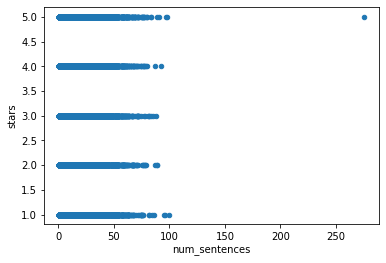

In [17]:
#df['num_words'].hist(bins=100)
#df.boxplot(column=['num_words'])
df.plot.scatter(y='stars', x='num_sentences')

<AxesSubplot:xlabel='num_words', ylabel='stars'>

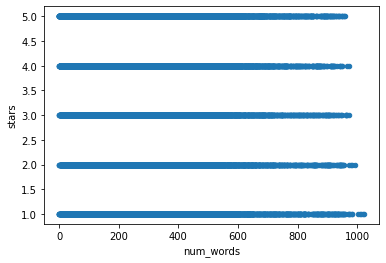

In [18]:
df.plot.scatter(y='stars', x='num_words')

<AxesSubplot:>

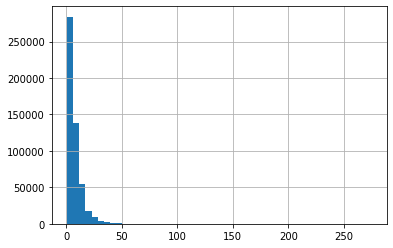

In [53]:
df['num_sentences'].hist(bins=50)

In [58]:
test = df['num_words'].value_counts(normalize=True)

<AxesSubplot:>

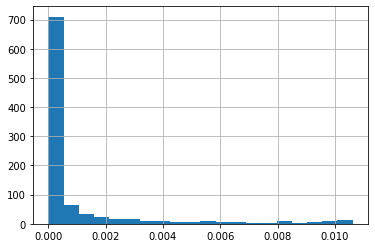

In [62]:
test.hist(bins=20)